In [1]:
import pandas as pd
df = pd.read_csv("data/loan_data.csv")
df.head()

,ID,Income,Term,Balance,Debt,Score,Default
0,567,17500,Short Term,1460,272,225.0,False
1,523,18500,Long Term,890,970,187.0,False
2,544,20700,Short Term,880,884,85.0,False
3,370,21600,Short Term,920,0,NaN,False
4,756,24300,Short Term,1260,0,495.0,False


In [2]:
df = df.set_index("ID")
df.head()

,Income,Term,Balance,Debt,Score,Default
ID,,,,,,
567,17500,Short Term,1460,272,225.0,False
523,18500,Long Term,890,970,187.0,False
544,20700,Short Term,880,884,85.0,False
370,21600,Short Term,920,0,NaN,False
756,24300,Short Term,1260,0,495.0,False


In [4]:
df.shape

(856, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 856 entries, 567 to 847
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Income   856 non-null    int64  
 1   Term     856 non-null    object 
 2   Balance  856 non-null    int64  
 3   Debt     856 non-null    int64  
 4   Score    836 non-null    float64
 5   Default  856 non-null    bool   
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 41.0+ KB


In [24]:
df.describe()

,Income,Balance,Debt,Score
count,856.000000,856.000000,856.000000,836.000000
mean,29882.009346,1214.334112,643.785047,450.922249
std,13976.264882,587.764941,1150.286509,269.207175
min,11800.000000,140.000000,0.000000,0.000000
25%,19800.000000,910.000000,0.000000,242.750000
50%,22900.000000,1120.000000,65.000000,376.500000
75%,39025.000000,1370.000000,958.750000,647.250000
max,86000.000000,6020.000000,12891.000000,1000.000000


In [8]:
df['Default'].value_counts()

Default
False    768
True      88
Name: count, dtype: int64

In [9]:
pd.read_excel?

Signature:
pd.read_excel(
    io,
    sheet_name: 'str | int | list[IntStrT] | None' = 0,
    *,
    header: 'int | Sequence[int] | None' = 0,
    names: 'SequenceNotStr[Hashable] | range | None' = None,
    index_col: 'int | str | Sequence[int] | None' = None,
    usecols: 'int | str | Sequence[int] | Sequence[str] | Callable[[str], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb', 'calamine'] | None" = None,
    converters: 'dict[str, Callable] | dict[int, Callable] | None' = None,
    true_values: 'Iterable[Hashable] | None' = None,
    false_values: 'Iterable[Hashable] | None' = None,
    skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    parse_dates: 'list | dict | bool' = False,
    date_parser: 'Callable | lib.NoDefault' = <no_default>,
    da

In [19]:
import sqlite3
db_conn = sqlite3.connect(r"data/movies_db.sqlite")

movies = pd.read_sql(r"SELECT * FROM movies", db_conn)
movies

,id,name,year,rating
0,1,Who's Afraid of Virginia Woolf?,1966,10
1,2,Zardoz,1974,6
2,3,2001: A Space Odyssey,1968,9


In [23]:

tables = pd.read_sql(r"SELECT * FROM sqlite_master WHERE type='table'", db_conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movies,movies,2,CREATE TABLE movies\n ( id ...


In [25]:
weather1 = pd.read_json("data/weather_data.json")
weather1

,day,temp,humidity,sun_hrs
0,2023-07-15,15.68,73.18,6.40
1,2023-07-16,25.16,83.88,8.06
2,2023-07-17,13.26,80.05,4.89
3,2023-07-18,24.63,82.37,9.13
4,2023-07-19,12.78,83.10,17.10
5,2023-07-20,23.52,85.35,0.72
6,2023-07-21,17.80,85.64,5.79
7,2023-07-22,24.98,76.81,10.95
8,2023-07-23,23.48,80.86,3.77
9,2023-07-24,23.30,79.96,14.62


In [26]:
weather = pd.read_json("data/weather.json", orient="split")
weather

,temp,humidity,sun_hrs
2023-07-15,15.68,73.18,6.40
2023-07-16,25.16,83.88,8.06
2023-07-17,13.26,80.05,4.89
2023-07-18,24.63,82.37,9.13
2023-07-19,12.78,83.10,17.10
2023-07-20,23.52,85.35,0.72
2023-07-21,17.80,85.64,5.79
2023-07-22,24.98,76.81,10.95
2023-07-23,23.48,80.86,3.77
2023-07-24,23.30,79.96,14.62


In [30]:
weather1['day']

0    2023-07-15
1    2023-07-16
2    2023-07-17
3    2023-07-18
4    2023-07-19
5    2023-07-20
6    2023-07-21
7    2023-07-22
8    2023-07-23
9    2023-07-24
Name: day, dtype: object

In [38]:
#pd.to_datetime(weather1['day'], format = '%Y-%m-%d')
weather1['day'] = pd.to_datetime(weather1['day'])
weather1['day']

0   2023-07-15
1   2023-07-16
2   2023-07-17
3   2023-07-18
4   2023-07-19
5   2023-07-20
6   2023-07-21
7   2023-07-22
8   2023-07-23
9   2023-07-24
Name: day, dtype: datetime64[ns]

In [43]:
weather1.loc[0] #-> Series
weather1.loc[[0,1]] #-> DataFrame


,day,temp,humidity,sun_hrs
0,2023-07-15,15.68,73.18,6.40
1,2023-07-16,25.16,83.88,8.06


## Group by

In [44]:
df[['Term','Income','Default']].groupby("Term").mean()

,Income,Default
Term,,
Long Term,34416.544118,0.113971
Short Term,27770.034247,0.097603


In [45]:
df[['Term','Income','Default']].groupby(["Term",'Default']).mean()

Income
Term       Default              
Long Term  False    34819.087137
           True     31287.096774
Short Term False    28189.943074
           True     23887.719298

## Visualisation

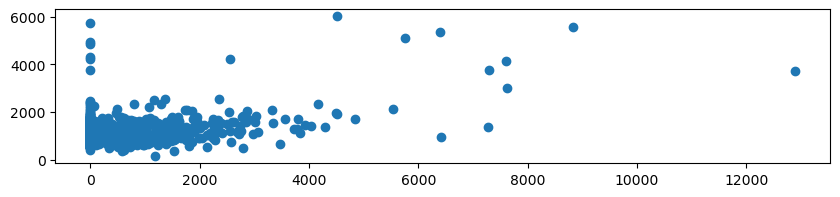

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , ax = plt.subplots(figsize= (10,2))

plt.scatter(df["Debt"], df["Balance"]);

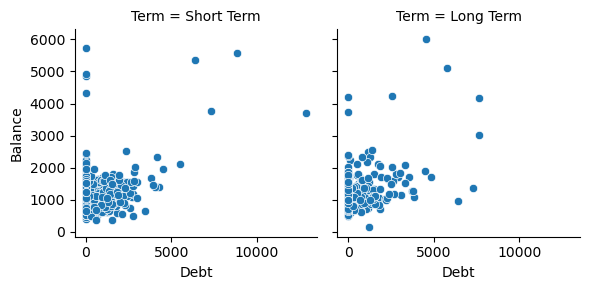

In [48]:
#Seaborn

sns.FacetGrid(df, col='Term', ).map(sns.scatterplot, "Debt", "Balance");


<Axes: >

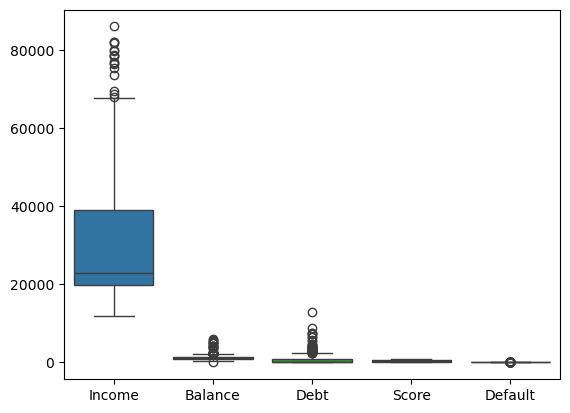

In [49]:

sns.boxplot(df)
#sns.boxplot(df.drop("Income", axis=1))
#plt.yscale('log')


In [ ]:
#!pip install scikit-learn

<Axes: >

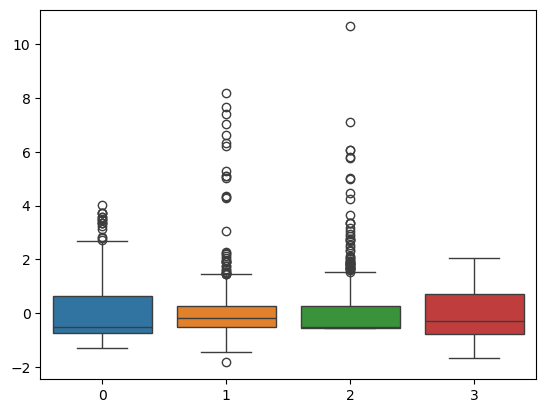

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[["Income", "Balance", "Debt", "Score"]])
scaled_df = scaler.transform(df[["Income", "Balance", "Debt", "Score"]])


sns.boxplot(scaled_df)

<Axes: xlabel='Income', ylabel='Count'>

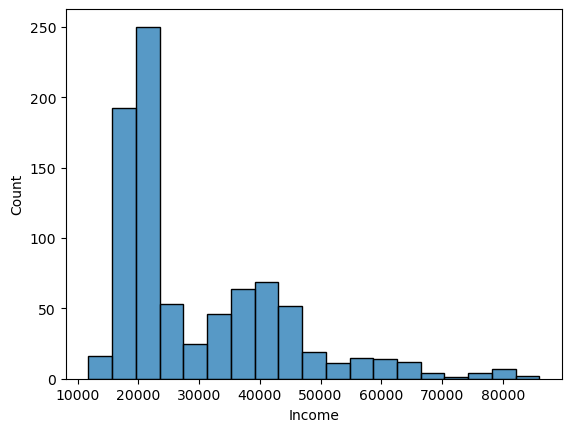

In [54]:
sns.histplot(data=df,x="Income")

<Axes: xlabel='Income', ylabel='Count'>

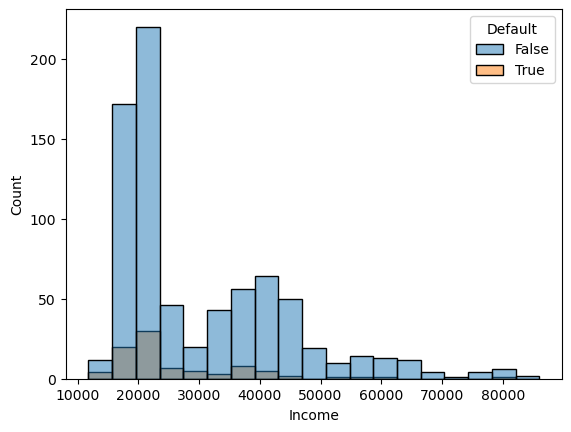

In [56]:
#Multivariate

sns.histplot(data=df,x="Income", hue= 'Default')

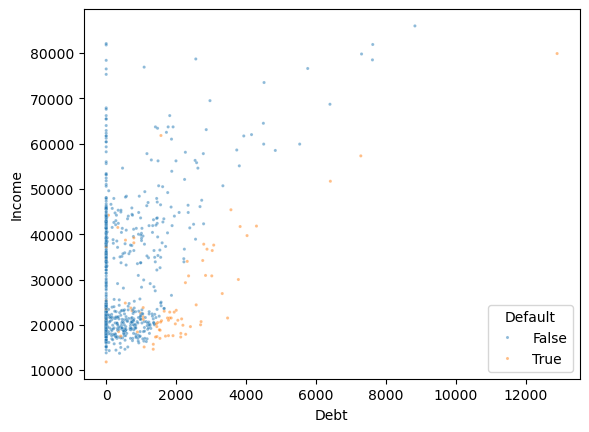

In [59]:
sns.scatterplot(data=df, x="Debt", y="Income", hue="Default", s=5, alpha = 0.5);

In [ ]:
sns.heatmap(data=df, )

## Data Cleansing